In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
plt.style.use('..\informes.mplstyle')

c_sp_sat = 'C9'  # Color del setpoint y banda de no saturacion
ls_sat = ':'  # Linestyle de la señal saturada

px2d = lambda x: x*(71/595)  # PiXel a Distancia
b2V = lambda x: (x/255)*5  # Bits a Voltaje

Posiciones

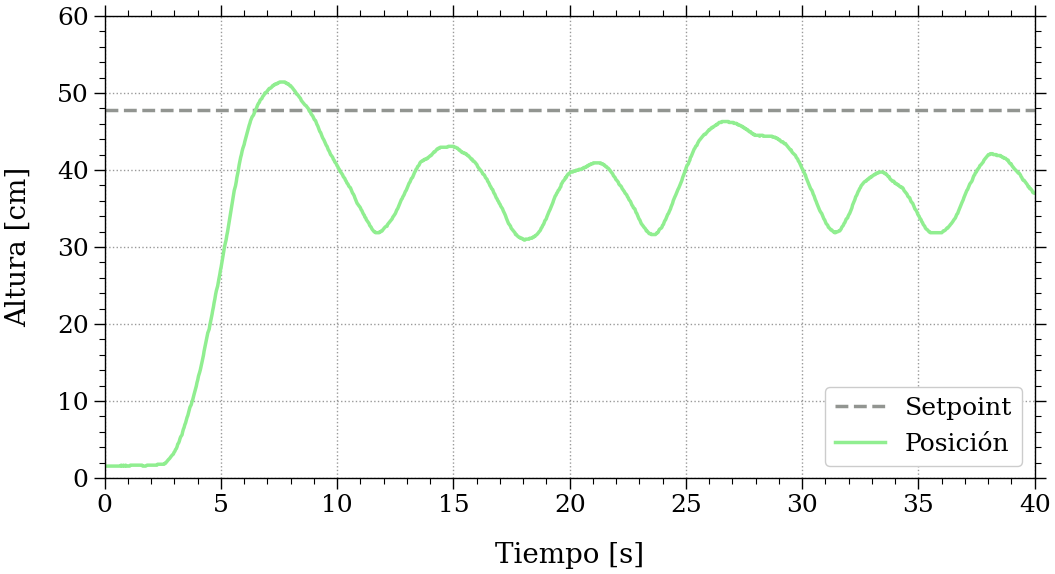

In [3]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2d(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\P-altura')
plt.show()

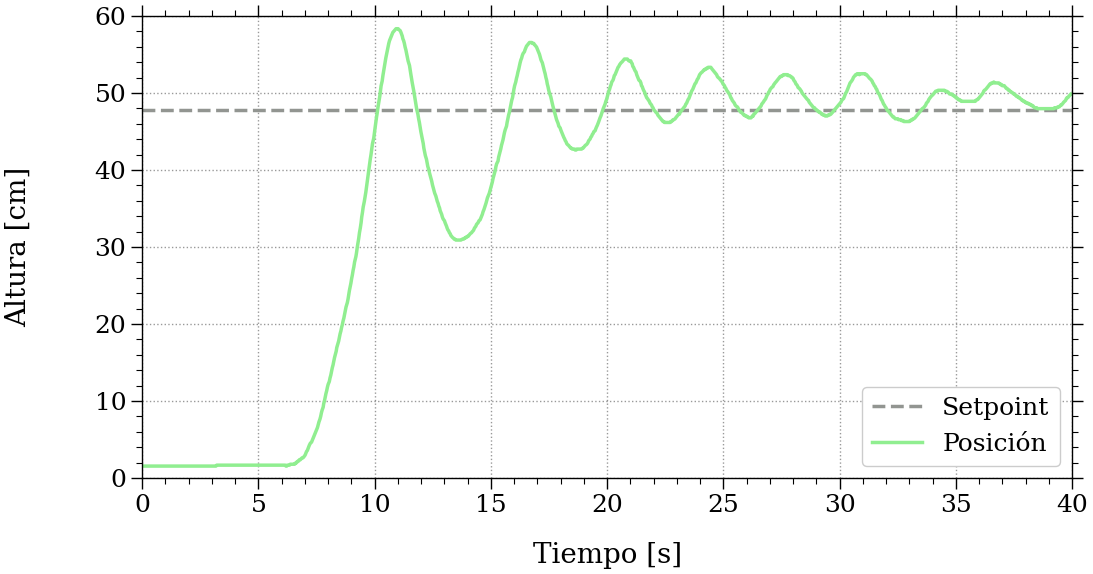

In [4]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2d(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\PI-altura')
plt.show()

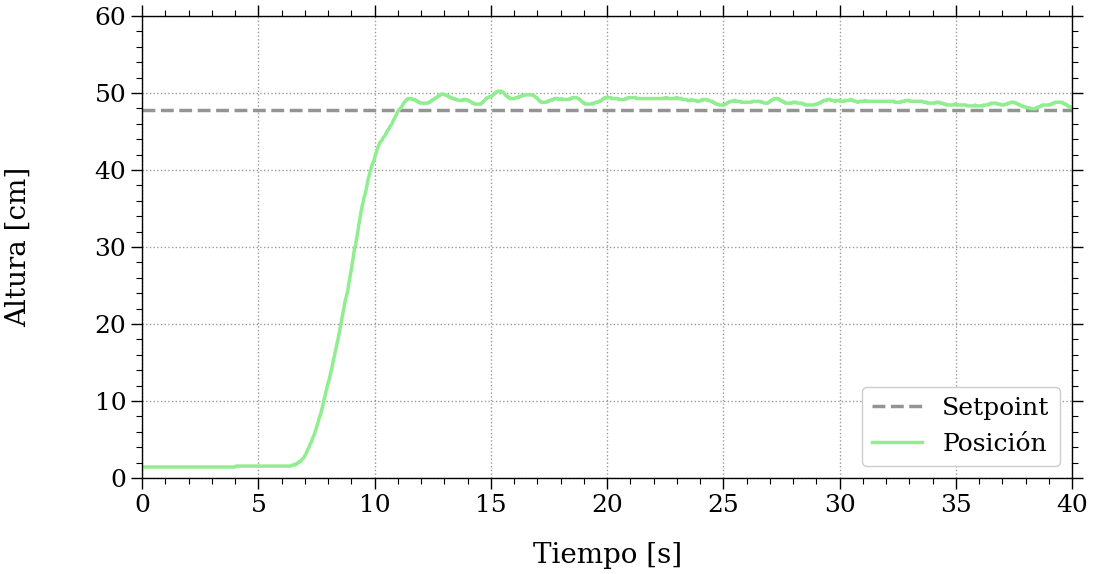

In [6]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2d(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\PID-altura')
plt.show()

Señales de control

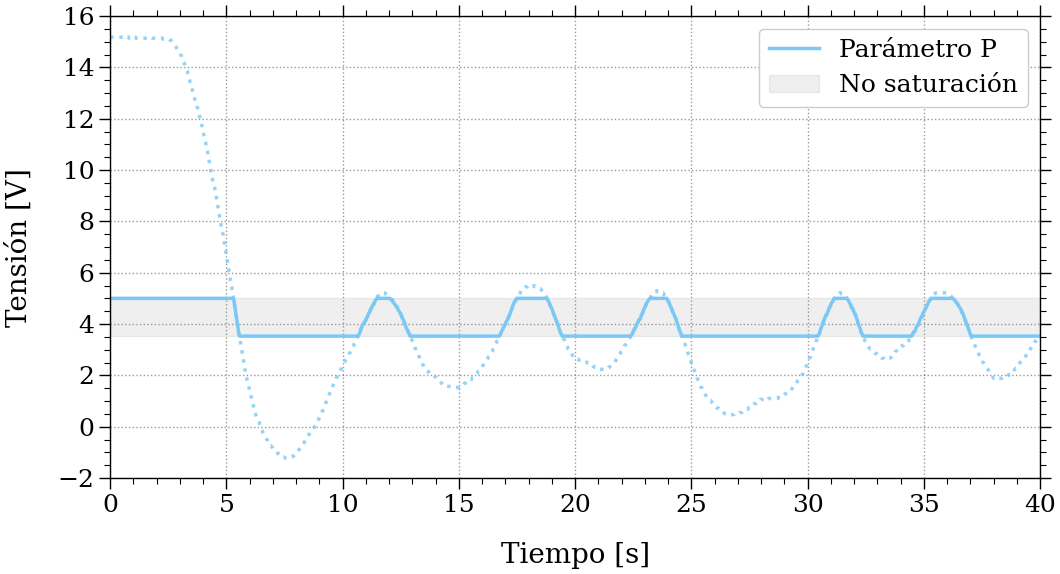

In [8]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = b2V(df['P'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Tensión [V]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-2, 16)


# PLOTS

ax.plot(t, P, c='C1', ls=ls_sat, alpha=0.8)
P[P < b2V(180)] = b2V(180)
P[P > 5] = 5
ax.plot(t, P, c='C1', label='Señal de control')
ax.fill_between([0, 45], 2*[b2V(180)], 2*[5], color=c_sp_sat,
                alpha=0.15, label='No saturación')


ax.legend()
# fig.savefig('.\Figuras\P-señal')
plt.show()

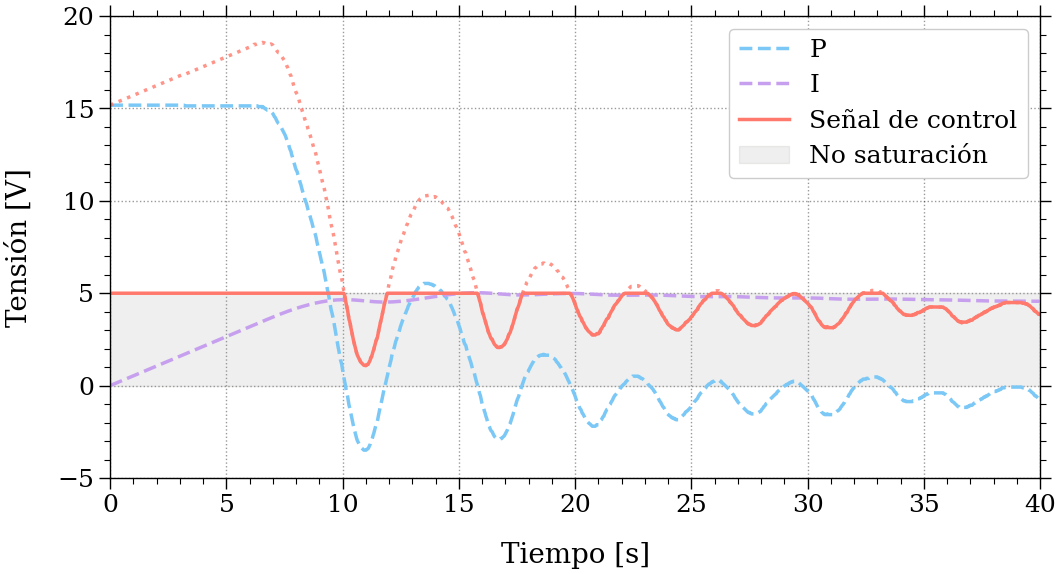

In [62]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = b2V(df['P'].values)
I = b2V(df['I'].values)
PI = P + I


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Tensión [V]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-5, 20)


# PLOTS
# P
ax.plot(t, P, '--', c='C1', label='P')
# I
ax.plot(t, I, '--', c='C2', label='I')
# PI
ax.plot(t, PI, c='C3', ls=ls_sat, alpha=0.8)
PI[PI < 0] = 0
PI[PI > 5] = 5
ax.plot(t, PI, c='C3', label='Señal de control')

ax.fill_between([0, 45], 2*[0], 2*[5], color=c_sp_sat,
                   alpha=0.15, label='No saturación')


ax.legend()
# fig.savefig('.\Figuras\PI-señal')
plt.show()

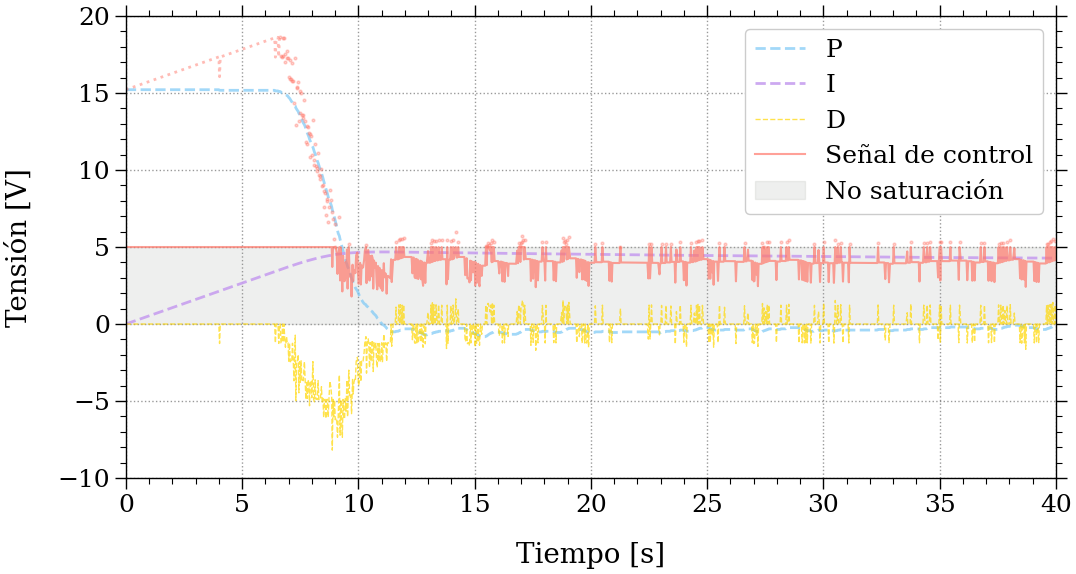

In [20]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = b2V(df['P'].values)
I = b2V(df['I'].values)
D = b2V(df['D'].values)
PID = P + I + D


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Tensión [V]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-10, 20)


# PLOTS

alpha_sat = 0.5
alpha_no_sat = 0.7
linewidth = 2
# P
ax.plot(t, P, '--', c='C1', label='P', alpha=alpha_no_sat,linewidth=linewidth)
# I
ax.plot(t, I, '--', c='C2', label='I', alpha=alpha_no_sat+.2,linewidth=linewidth)
# D
ax.plot(t, D, '--', c='C4', label='D', alpha=alpha_no_sat,linewidth=linewidth-1)
# PID
# Saturado
PID_sat = PID[PID > 5][185:]
t_sat = t[PID > 5][185:]
ax.plot(t[:185], PID[:185], c='C3', ls=ls_sat, alpha=alpha_sat,linewidth=linewidth)
ax.plot(t_sat, PID_sat, '.', c='C3', markersize=4, alpha=alpha_sat-0.15)
# No saturado
PID[PID < 0] = 0
PID[PID > 5] = 5
ax.plot(t, PID, c='C3', label='Señal de control', alpha=alpha_no_sat,linewidth=linewidth-0.5)

ax.fill_between([0, 45], 2*[0], 2*[5], color=c_sp_sat,
                   alpha=0.15, label='No saturación')


ax.legend()
# fig.savefig('.\Figuras\PID-señal')
plt.show()

On - Off

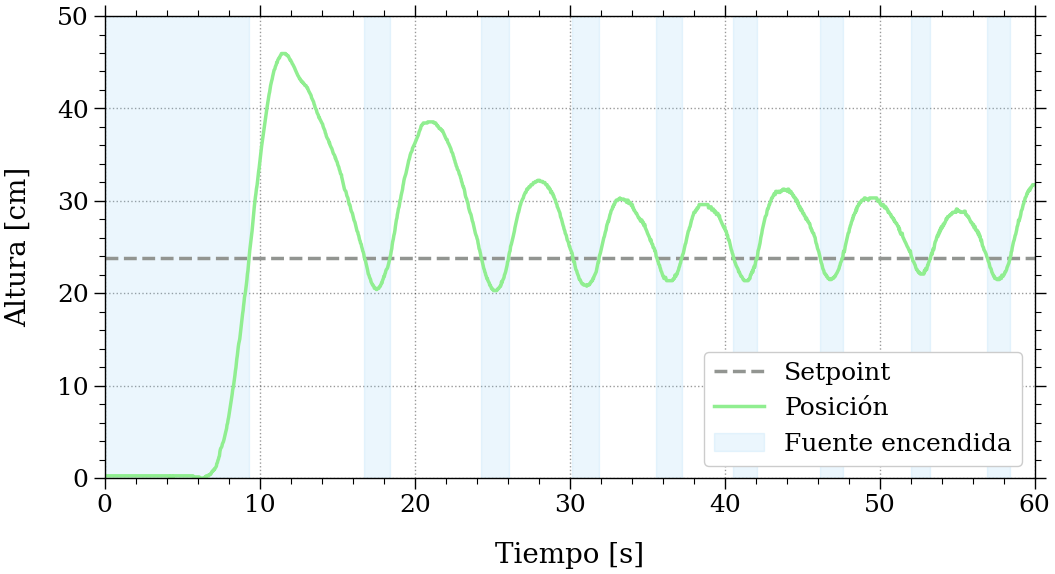

In [39]:
df = pd.read_csv('..\Mediciones\Clase 2\posiciones-onoff2.csv',
                 header=None, names=['Tiempo', 'Posicion', 'On-Off'])

t = df['Tiempo'].values
t -= t[0]
h = df['Posicion'].values
px2d_onoff = lambda x: x * 71/max(h)
h = px2d_onoff(h)
onoff = df['On-Off'].values


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 60)
ax.set_ylim(0, 50)


# PLOTS Y PEAKS

ax.axhline(px2d_onoff(200), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


peaks = find_peaks(np.abs(np.diff(onoff)), threshold=0.5)[0]
peaks = np.insert(peaks, 0, 0)
for i in range(0, len(peaks)-1, 2):
    ax.fill_betweenx([0, 50], t[peaks[i]], t[peaks[i+1]],
                        color='C1', alpha=0.15)
ax.fill_betweenx([0, 50], t[peaks[-1]], t[-1],
                 color='C1', alpha=0.15, label='Fuente encendida')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\On-off')
plt.show()